In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import pickle 
from ply import write_ply

from utilities import *
from VoxelGrid import *
import os

from PIL import ImageFont
from PIL import ImageDraw 

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
device='cuda' if torch.cuda.is_available() else 'cpu'



In [2]:
model="drums"
dataset= "../nerf_synthetic/" + model
focal, all_c2w, all_gt = get_data(dataset, "test")

LOAD DATA ../nerf_synthetic/drums/test


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 50.66it/s]


In [3]:
cust_c2ws = create_rotation_matrices(3,-45, n=60)
red_fac=2
ordir_rays=[]
for c2w in cust_c2ws:
    ray_np = get_rays_np(800,800, focal, c2w)
    oris = ray_np[0][::red_fac,::red_fac]
    direct = ray_np[1][::red_fac,::red_fac] # direction. optimal fac:3
    ordir_rays.append((oris, direct))

In [4]:
VG=VoxelGrid()
#VG.load(model+'_carve.obj')

VG.load(model+'_best.obj')

VG.save_pointcloud()

  0%|                                                    | 0/60 [00:00<?, ?it/s]

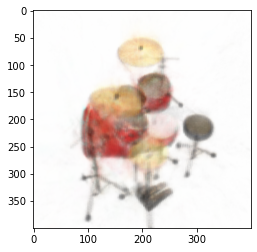

  2%|▋                                           | 1/60 [00:01<01:28,  1.50s/it]

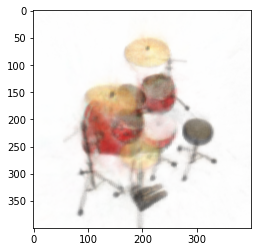

  3%|█▍                                          | 2/60 [00:02<01:22,  1.43s/it]

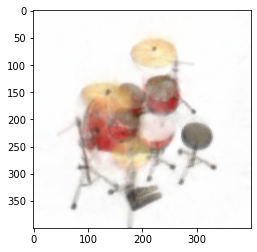

  5%|██▏                                         | 3/60 [00:04<01:19,  1.40s/it]

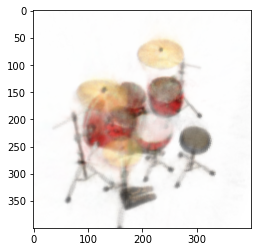

  7%|██▉                                         | 4/60 [00:05<01:17,  1.39s/it]

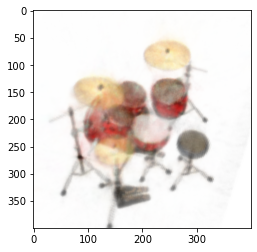

  8%|███▋                                        | 5/60 [00:07<01:16,  1.40s/it]

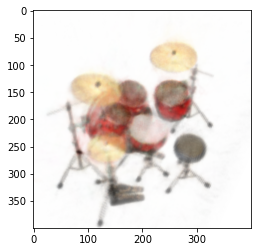

 10%|████▍                                       | 6/60 [00:08<01:14,  1.39s/it]

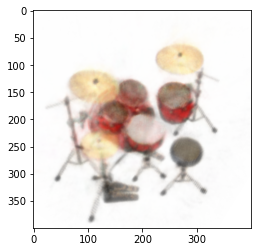

 12%|█████▏                                      | 7/60 [00:09<01:13,  1.38s/it]

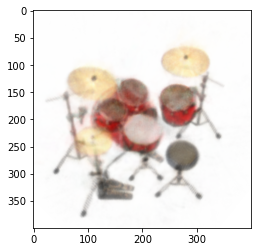

 13%|█████▊                                      | 8/60 [00:11<01:11,  1.38s/it]

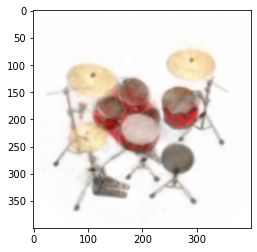

 15%|██████▌                                     | 9/60 [00:12<01:10,  1.38s/it]

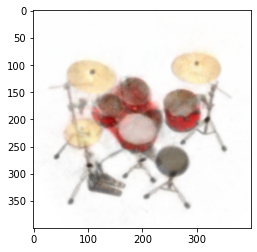

 17%|███████▏                                   | 10/60 [00:13<01:08,  1.37s/it]

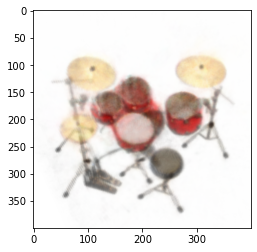

 18%|███████▉                                   | 11/60 [00:15<01:07,  1.37s/it]

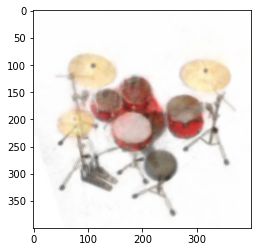

 20%|████████▌                                  | 12/60 [00:16<01:05,  1.37s/it]

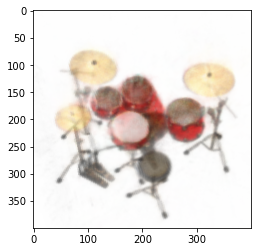

 22%|█████████▎                                 | 13/60 [00:17<01:04,  1.37s/it]

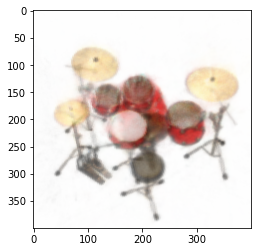

 23%|██████████                                 | 14/60 [00:19<01:03,  1.37s/it]

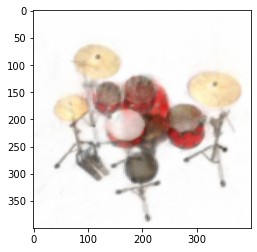

 25%|██████████▊                                | 15/60 [00:20<01:01,  1.37s/it]

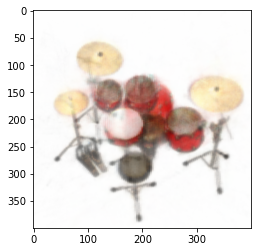

 27%|███████████▍                               | 16/60 [00:22<01:00,  1.37s/it]

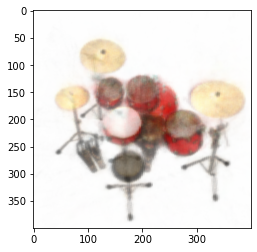

 28%|████████████▏                              | 17/60 [00:23<00:58,  1.37s/it]

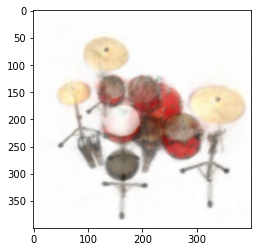

 30%|████████████▉                              | 18/60 [00:24<00:57,  1.37s/it]

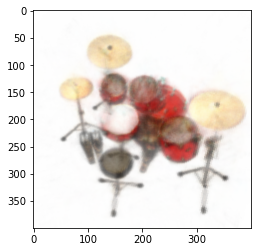

 32%|█████████████▌                             | 19/60 [00:26<00:56,  1.37s/it]

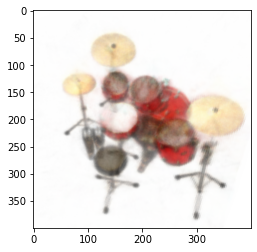

 33%|██████████████▎                            | 20/60 [00:27<00:54,  1.37s/it]

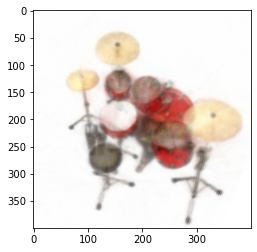

 35%|███████████████                            | 21/60 [00:29<00:54,  1.40s/it]


KeyboardInterrupt: 

In [5]:
imgs=[]
for image_ind in tqdm(range(len(cust_c2ws))):
    with torch.no_grad():
        new_im = VG.render_large_image_from_rays(ordir_rays[image_ind],(1800, 1.2))
        plt.imshow(new_im)
        plt.show()
        imgs.append(np.uint8(255*new_im))

In [11]:
imageio.mimwrite('exports/movies_'+model+'.gif', imgs,  format='GIF', duration=0.04)

# View

In [40]:
red = 2
disp_ims, disp_rays = reduce_data(all_c2w, all_gt, focal, red)
disp_im_w = disp_ims[0].shape[0]
print(disp_im_w)

400


73


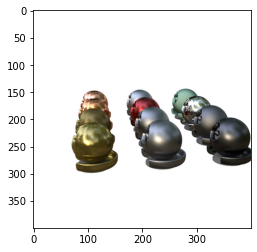

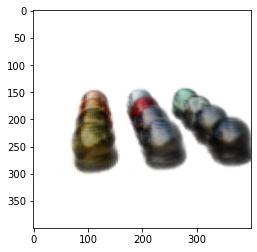

In [41]:
image_ind=np.random.randint(99)
print(image_ind)
im_ref = disp_ims[image_ind]
new_im = VG.render_large_image_from_rays(disp_rays[image_ind],(500,1.2))
plt.imshow(im_ref)
plt.show()
plt.imshow(new_im)
plt.show()

In [29]:
plt.imsave("exports/comp/"+model+"_ref.png", im_ref)
plt.imsave("exports/comp/"+model+".png", new_im)